###  Import Statements


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from scipy.stats import skew

#### Notebook Presentation

In [3]:
pd.options.display.float_format = '{:,.2f}'.format

# Load the Data

The first column in the .csv file just has the row numbers, so it will be used as the index. 

In [4]:
data = pd.read_csv('/workspaces/Multivariable_Regression/boston.csv', index_col=0)

# Data Exploration

In [5]:
print(f"Data types:\n{data.dtypes}")

Data types:
CRIM       float64
ZN         float64
INDUS      float64
CHAS       float64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD        float64
TAX        float64
PTRATIO    float64
B          float64
LSTAT      float64
PRICE      float64
dtype: object


In [6]:
print(f'the dataset has {data.shape[0]} rows and {data.shape[1]} columns')

the dataset has 506 rows and 14 columns


In [7]:
data.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'PRICE'],
      dtype='object')

## Data Cleaning - Check for Missing Values and Duplicates

In [8]:
#check if the data has missing values
data.isnull().values.any()

False

In [9]:
#check if data has duplicates
data.duplicated().values.any()

False

## Descriptive Statistics

In [10]:
# find the average pupil-teacher ratio by town(PTRATIO) 
print(f"the average pupil-teacher ratio by town(PTRATIO) is {round(data['PTRATIO'].mean(),2)}")

the average pupil-teacher ratio by town(PTRATIO) is 18.46


In [11]:
# find the average price of a home
print(f"the average price of a home is ${round(data['PRICE'].mean()*1000)}")

the average price of a home is $22533


In [12]:
#find max and min of value of the CHAS
print(f'The maximum price for CHAS houses is: ${data[data.CHAS==1].PRICE.max()*1000}')
print(f'The minimum price for CHAS houses is: ${data[data.CHAS==1].PRICE.min()*1000}')

The maximum price for CHAS houses is: $50000.0
The minimum price for CHAS houses is: $13400.0


In [71]:
#finding the maximum and the minimum number of rooms per dwelling
print("Maximum number of rooms per dwelling: ", max(round(data['RM'])))
print("Minimum number of rooms per dwelling: ", min(round(data['RM'])))

Maximum number of rooms per dwelling:  9.0
Minimum number of rooms per dwelling:  4.0


## Visualise the Features

#### House Prices

C:\Users\Nawaf\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


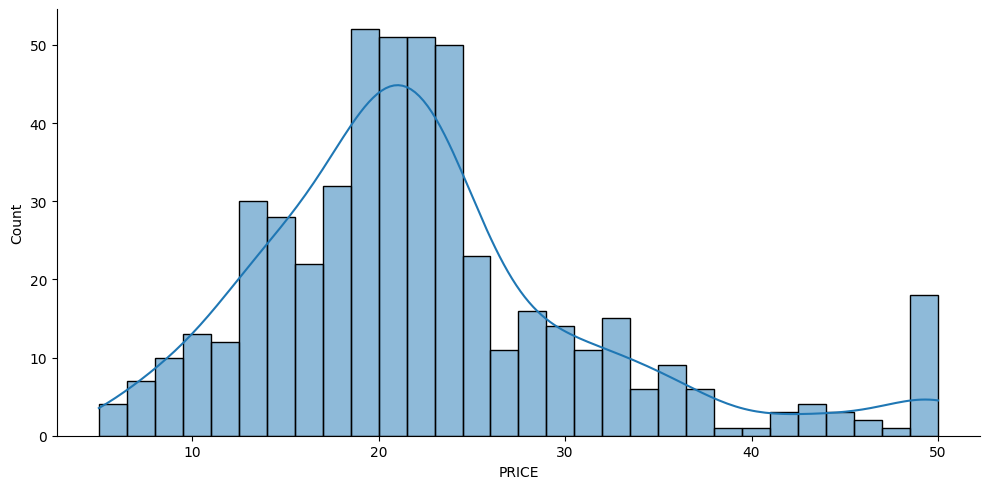

In [14]:
#using seaborn to creat a bar chart for PRICE
sns.displot(data['PRICE'], kde=True, bins=30, aspect=2)

#### Number of Rooms

C:\Users\Nawaf\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


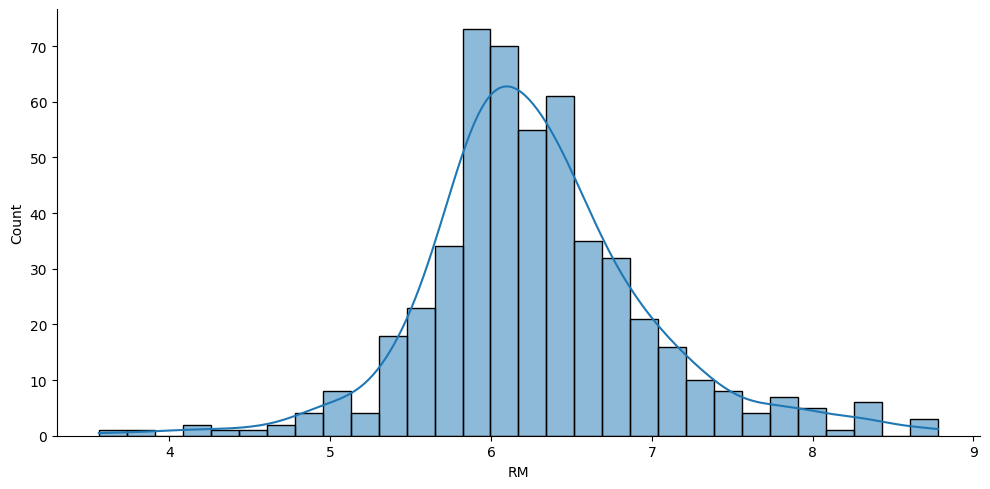

In [15]:
sns.displot(data['RM'], kde=True, bins=30, aspect=2)

#### Distance to Employment - Length of Commute

C:\Users\Nawaf\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


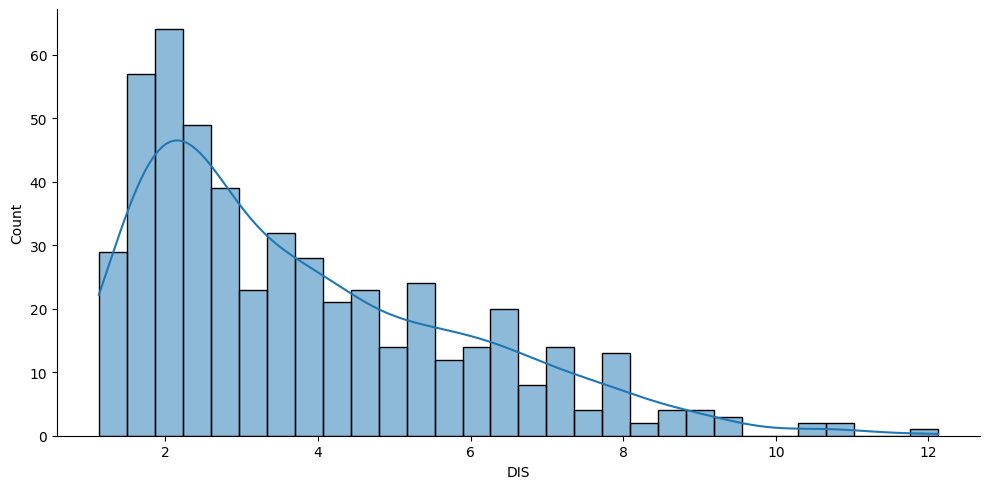

In [16]:
sns.displot(data['DIS'], kde=True, bins=30, aspect=2)

#### Access to Highways 

C:\Users\Nawaf\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


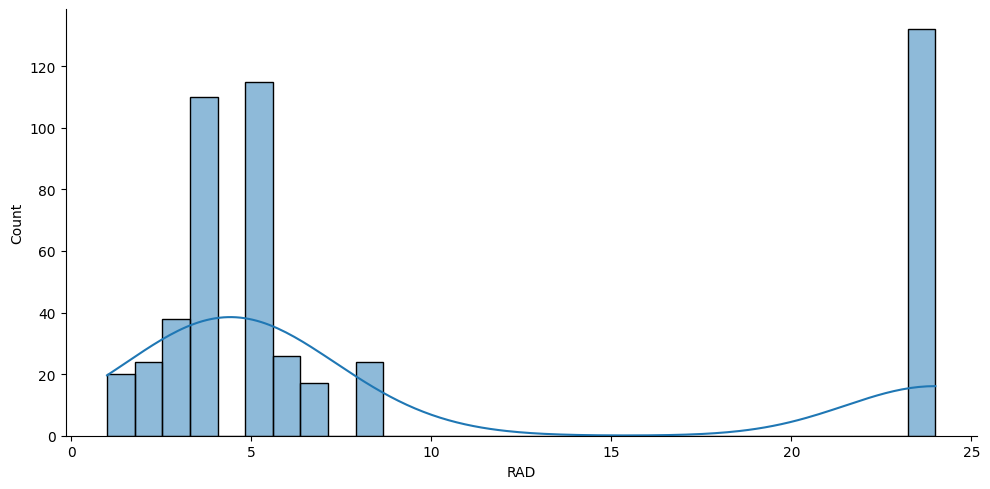

In [17]:
sns.displot(data['RAD'], kde=True, bins=30, aspect=2)

#### Next to the River?


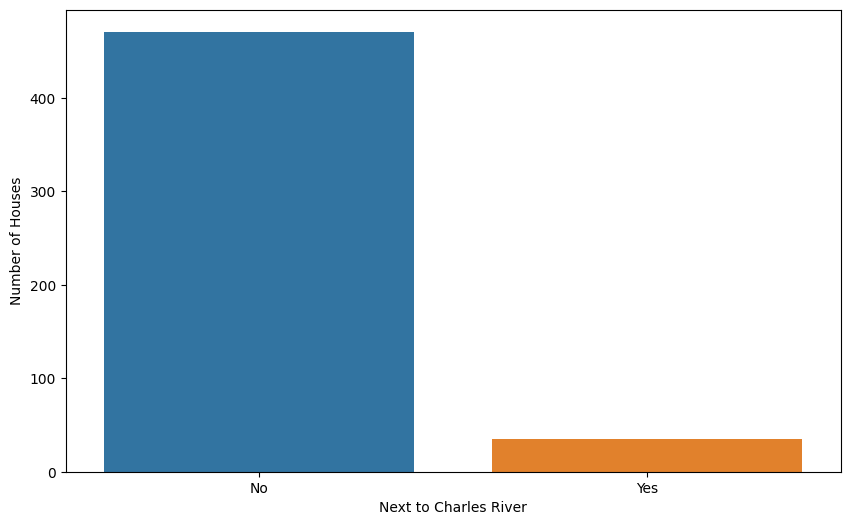

In [18]:
#creat a bar chart with plotly for CHAS to show many houses are near the Charles River, X-axis should be Yes and No, Y-axis should be the count of Yes and No
plt.figure(figsize=(10,6))
sns.countplot(x='CHAS',data=data)
plt.xlabel('Next to Charles River')
plt.ylabel('Number of Houses')
plt.xticks([0, 1], ['No', 'Yes'])
plt.show()


# Understand the Relationships in the Data

#### Run a Pair Plot

C:\Users\Nawaf\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


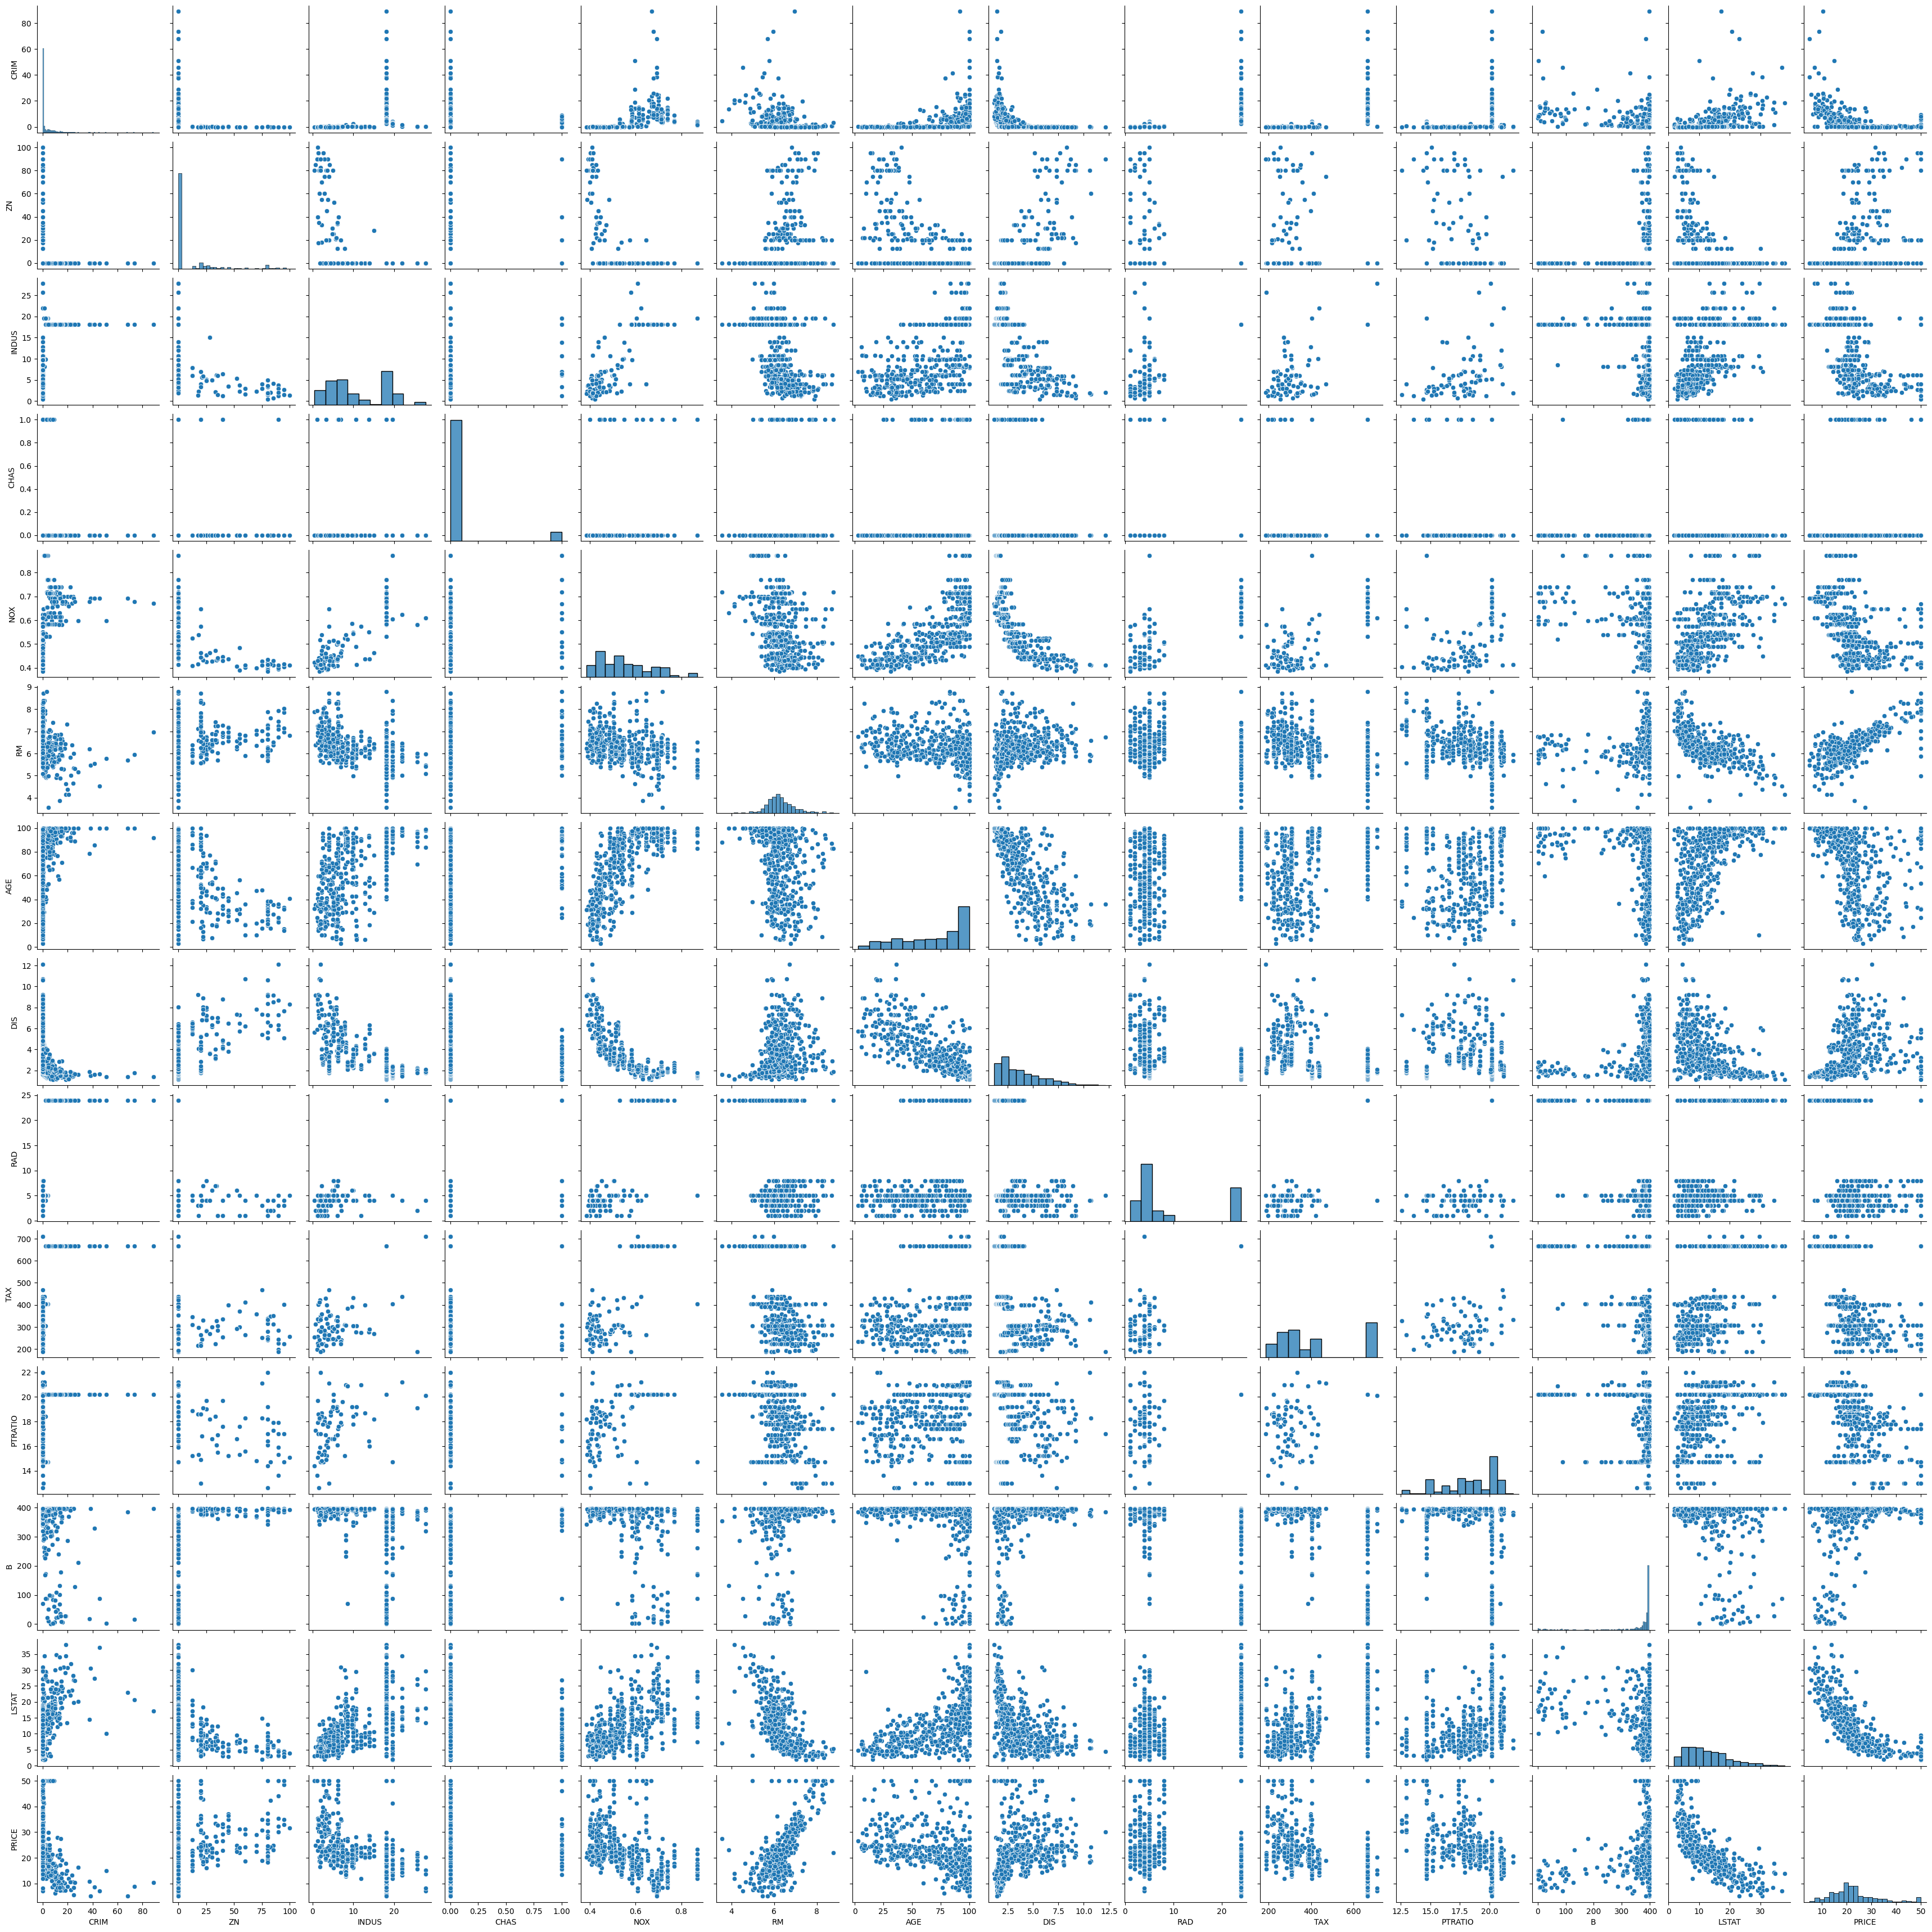

In [70]:
#we can plot all relationships between all variables in a single plot
sns.pairplot(data)
plt.show()

C:\Users\Nawaf\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


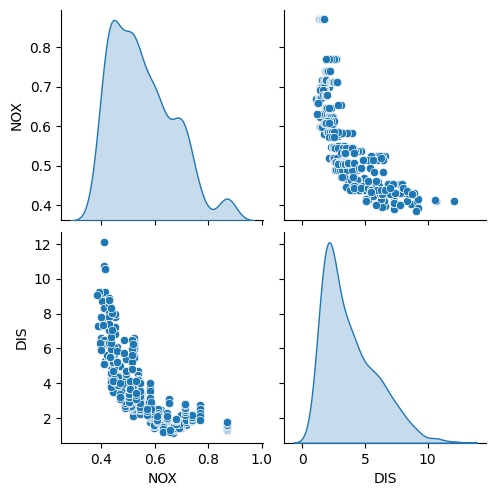

In [19]:
#plot the relationship between NOX and DIS
sns.pairplot(data[['NOX','DIS']], diag_kind='kde')

from the graph we can see a negative relation between NOX and DIS

C:\Users\Nawaf\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


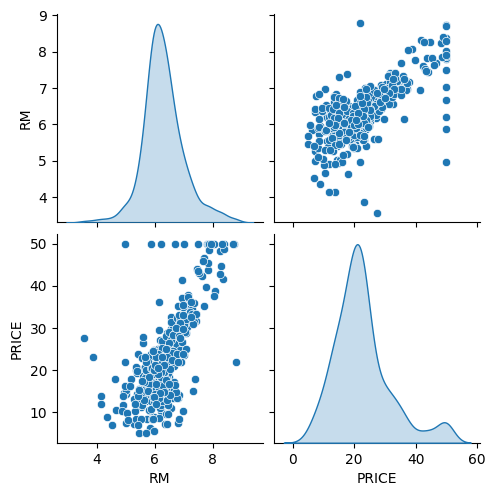

In [20]:
#plot the relationship between RM and PRICE
sns.pairplot(data[['RM','PRICE']], diag_kind='kde')

and here show a postive graph 

C:\Users\Nawaf\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


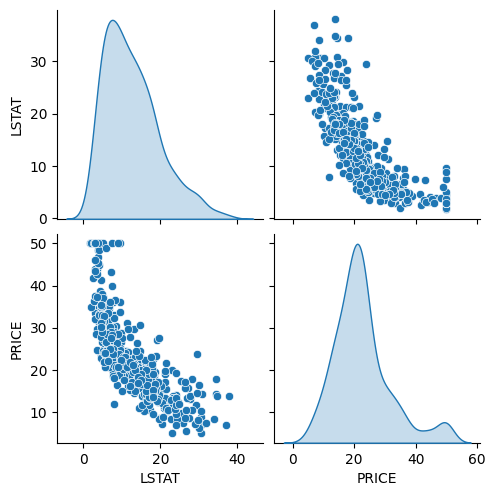

In [21]:
#plot the relationship between LSTAT and PRICE
sns.pairplot(data[['LSTAT','PRICE']], diag_kind='kde')

#### Distance from Employment vs. Pollution

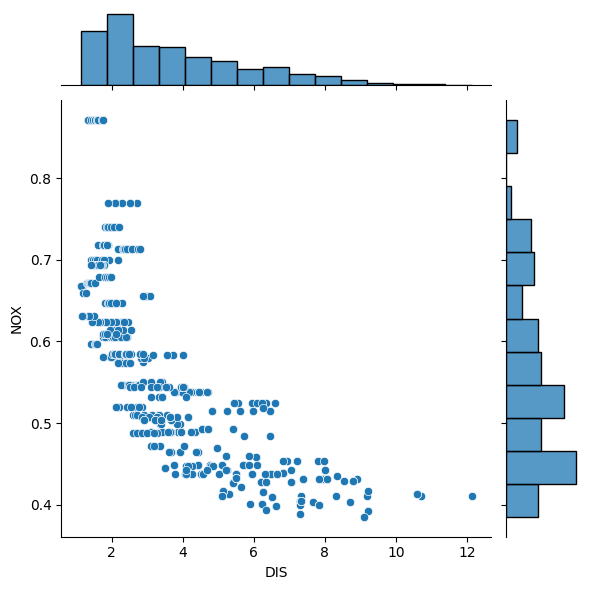

In [69]:
#compare DIS with NOX using sns.jointplot()
sns.jointplot(x='DIS', y='NOX', data=data, kind='scatter')

we can see as distance increase the polution level is decreasing

#### Proportion of Non-Retail Industry vs Pollution 

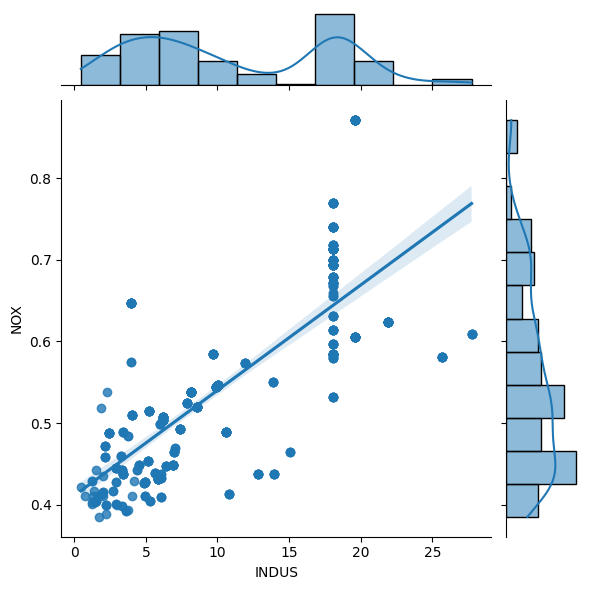

In [23]:
#compare INDUS with NOX using sns.jointplot
sns.jointplot(x='INDUS', y='NOX', data=data, kind='reg')

as proportion of non-retail industry increas the polution increase with it 

#### % of Lower Income Population vs Average Number of Rooms

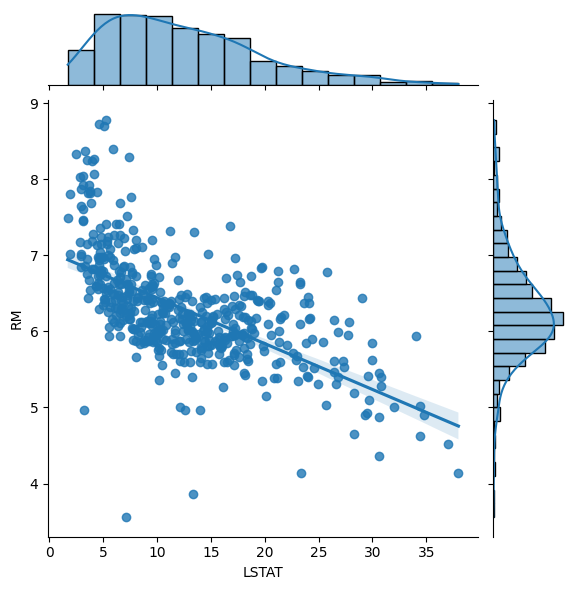

In [24]:
#compare LSTAT with RM using sns.jointplot
sns.jointplot(x='LSTAT', y='RM', data=data, kind='reg')

the higher proporiton of lower income population, the lower number of rooms per house

#### % of Lower Income Population versus Home Price

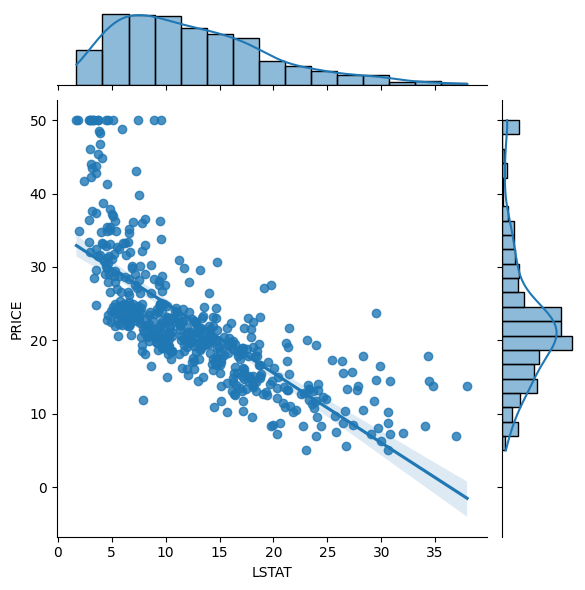

In [25]:
#compare LSTAT with PRICE 
sns.jointplot(x='LSTAT', y='PRICE', data=data, kind='reg')

as logic goes, the higher the price the lower proportion of low-income population

#### Number of Rooms versus Home Value

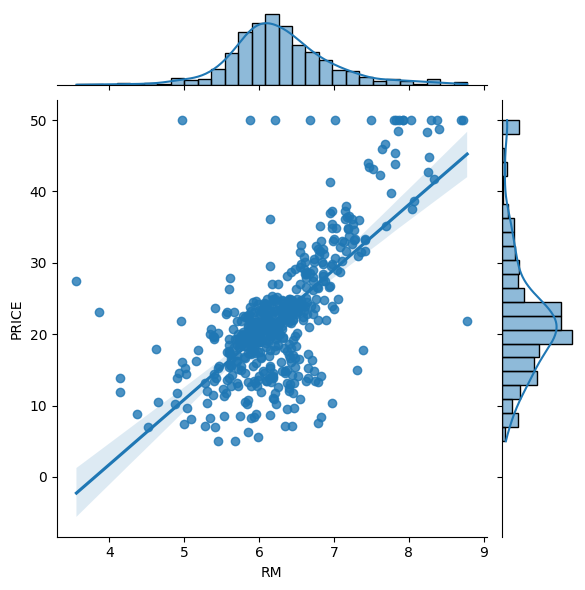

In [26]:
#compare RM with PRICE using sns.jointplot
sns.jointplot(x='RM', y='PRICE', data=data, kind='reg')

No wonder :D, the more room you have the higher the price

# Split Training & Test Dataset

In [28]:
#creat 4 subsets: X_train, X_test, y_train, y_test 
y = data['PRICE']
X = data.drop('PRICE', axis=1)
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2, 
                                                    random_state=10)

# Multivariable Regression

Our Linear Regression model will have the following form:

$$ PR \hat ICE = \theta _0 + \theta _1 RM + \theta _2 NOX + \theta _3 DIS + \theta _4 CHAS ... + \theta _{13} LSTAT$$

### Run Your First Regression

In [29]:
#use sklearn to run the regression on the training data
model = LinearRegression()
model.fit(X_train, y_train)
rsquared = round(model.score(X_train, y_train), 2)
print(f"R2: {rsquared}")

R2: 0.75


### Evaluate the Coefficients of the Model

Here we do a sense check on our regression coefficients. The first thing to look for is if the coefficients have the expected sign (positive or negative). 

In [30]:
#print out the coefficients of the model, using table the first column is the name of the feature, the second column is the estimated coefficient
coeff_df = pd.DataFrame(model.coef_,X.columns,columns=['Coefficient'])
coeff_df

,Coefficient
CRIM,-0.13
ZN,0.06
INDUS,-0.01
CHAS,1.97
NOX,-16.27
RM,3.11
AGE,0.02
DIS,-1.48
RAD,0.30
TAX,-0.01


<h5>if we recall the graph we did before, there was a postive correlation between the price and the number of rooms, and when we see the coefficient of those two we see that it's 3.11 which is a positive number, so we can say that the price is increasing with the number of rooms. Also the correlation between the price and the amount of poverty is negative, and the coefficient is -0.58, so we can say that the price is decreasing with the amount of poverty.<h5>

### Analyse the Estimated Values & Regression Residuals

The next step is to evaluate our regression. How good our regression is depends not only on the r-squared. It also depends on the **residuals** - the difference between the model's predictions ($\hat y_i$) and the true values ($y_i$) inside `y_train`. 


In [31]:
predicted_values = model.predict(X_train)
residuals = y_train - predicted_values

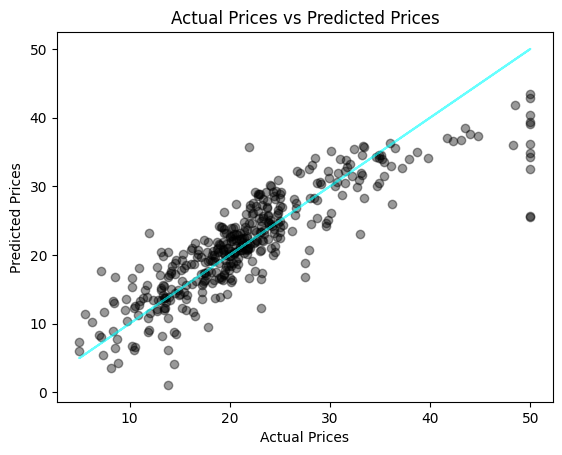

In [32]:
#ploting actual vs predicted prices, with cyan line in the middle shows y_train against y_train
plt.plot(y_train, y_train, color='cyan', alpha=0.6, linestyle='solid')
plt.scatter(y_train, predicted_values, color='black', alpha=0.4)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Prices vs Predicted Prices")
plt.show()

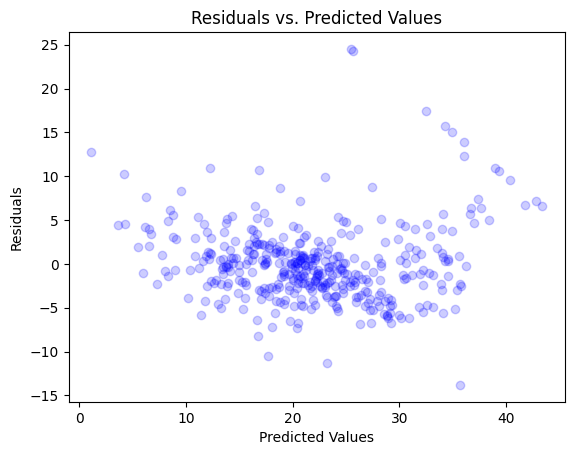

In [33]:
#graph the residuals against the predicted values
plt.scatter(predicted_values, residuals, alpha=.2, color='b')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs. Predicted Values')
plt.show()

We can analyse the distribution of the residuals. In particular, we're interested in the **skew** and the **mean**.

In an ideal case, what we want is something close to a normal distribution. A normal distribution has a skewness of 0 and a mean of 0. A skew of 0 means that the distribution is symmetrical - the bell curve is not lopsided or biased to one side.

In [34]:
#Calculate teh mean and the skewness of the residuals.
mean_residuals = round(np.mean(residuals), 4)
skewness_residuals = round(skew(residuals), 4)

C:\Users\Nawaf\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


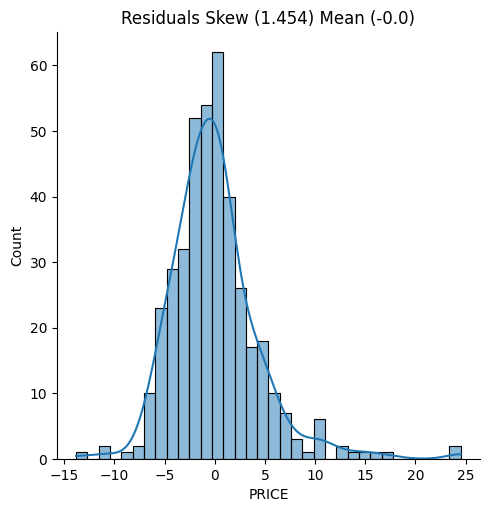

In [35]:
#creat a histogram and superimpose the kernel density estimate (KDE), which the x axis is the distance from the mean and y is probability density
sns.displot(residuals, kind='hist', kde=True)
plt.title(f'Residuals Skew ({skewness_residuals}) Mean ({mean_residuals})')
plt.show()

we can see the distrubution of the data is a bit skewed to the right, we can improve it by transforming the data to a normal distribution

### Data Transformations for a Better Fit
we will try a data transformation approach to see if we can improve the model fit. We will use a log transformation on the price variable. We will then fit a new model and compare the results to the original model. 

C:\Users\Nawaf\AppData\Local\Temp\ipykernel_14248\3099316300.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['PRICE'], kde= True)


<Axes: xlabel='PRICE', ylabel='Density'>

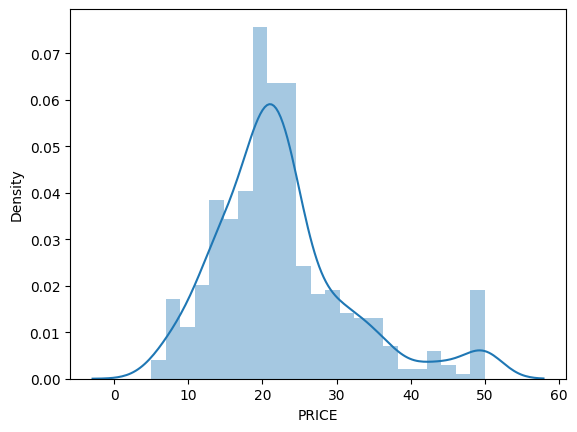

In [36]:
#graph a histogram of the price data
sns.distplot(data['PRICE'], kde= True)

In [37]:
price_skew = round(skew(data['PRICE']), 2)
print("Skewness of the price variable: ", price_skew)

Skewness of the price variable:  1.1


C:\Users\Nawaf\AppData\Local\Temp\ipykernel_14248\2167860188.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(price_log, kde= True)


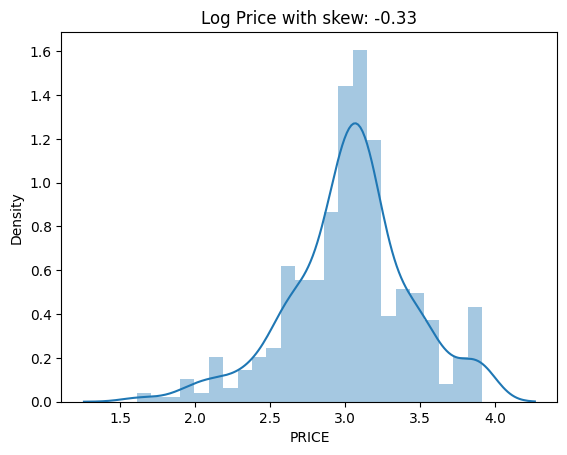

In [38]:
price_log = np.log(data['PRICE'])
log_skew = round(skew(price_log), 2)
sns.distplot(price_log, kde= True)
plt.title('Log Price with skew: ' + str(log_skew))
plt.show()

since -0.33 is closer to 0 than 1.454, we can say log distrubtion is better than normal distribution

## Regression using Log Prices

Using log prices instead, our model has changed to:

$$ \log (PR \hat ICE) = \theta _0 + \theta _1 RM + \theta _2 NOX + \theta_3 DIS + \theta _4 CHAS + ... + \theta _{13} LSTAT $$

In [39]:
# train test split using log price 
log_y = price_log
X = data.drop(['PRICE'], axis=1)
X_train, X_test, log_y_train, log_y_test = train_test_split(X, log_y, test_size=0.2, random_state=10)

In [47]:
#run regression
log_model = LinearRegression()
log_model.fit(X_train, log_y_train)
log_rsquared = round(log_model.score(X_train, log_y_train),2)
print(f"R2: {log_rsquared}")
log_predicitons = log_model.predict(X_train)
log_residuals = log_y_train - log_predicitons

R2: 0.79


In [56]:
print(f"since the R2 of log transformation {log_rsquared} \nis higher than normal data {rsquared},\nwe will use log transformation for the rest of the model.")

since the R2 of log transformation 0.79 
is higher than normal data 0.75,
we will use log transformation for the rest of the model.


## Evaluating Coefficients with Log Prices

In [42]:
#print out the coefficients of the model, using table the first column is the name of the feature, the second column is the estimated coefficient
coeff_df = pd.DataFrame(log_model.coef_,X.columns,columns=['Coefficient'])
coeff_df

,Coefficient
CRIM,-0.01
ZN,0.00
INDUS,0.00
CHAS,0.08
NOX,-0.70
RM,0.07
AGE,0.00
DIS,-0.05
RAD,0.01
TAX,-0.00


## Regression with Log Prices & Residual Plots

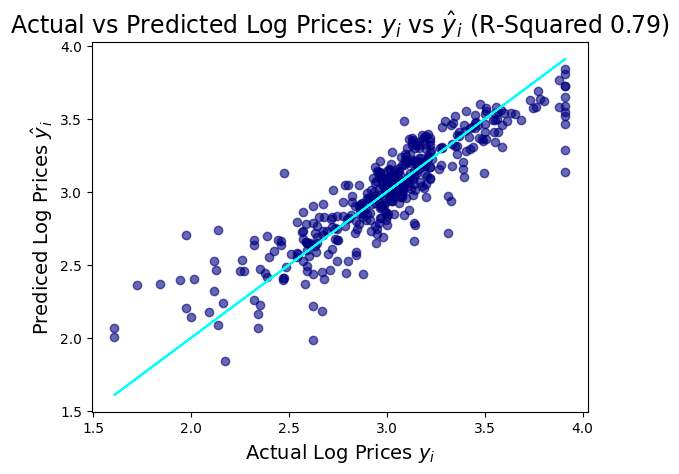

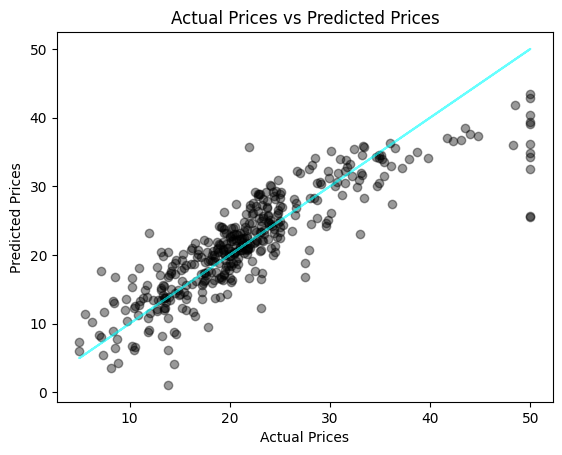

In [68]:
# Graph of Actual vs. Predicted Log Prices
plt.scatter(x=log_y_train, y=log_predicitons, c='navy', alpha=0.6)
plt.plot(log_y_train, log_y_train, color='cyan')
plt.title(f'Actual vs Predicted Log Prices: $y _i$ vs $\hat y_i$ (R-Squared {log_rsquared:.2})', fontsize=17)
plt.xlabel('Actual Log Prices $y _i$', fontsize=14)
plt.ylabel('Prediced Log Prices $\hat y _i$', fontsize=14)
plt.show()

# Original Regression of Actual vs. Predicted Prices
plt.plot(y_train, y_train, color='cyan', alpha=0.6, linestyle='solid')
plt.scatter(y_train, predicted_values, color='black', alpha=0.4)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Prices vs Predicted Prices")
plt.show()

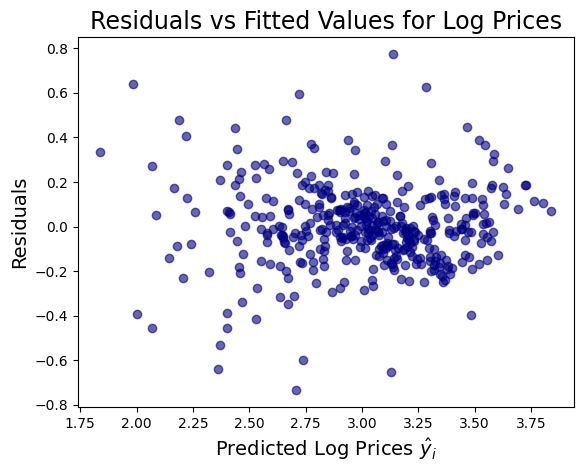

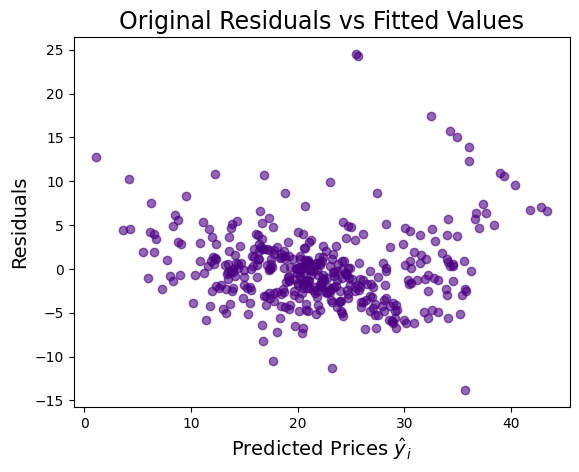

In [67]:

# Residuals vs Predicted values (Log prices)
plt.scatter(x=log_predicitons, y=log_residuals, c='navy', alpha=0.6)
plt.title('Residuals vs Fitted Values for Log Prices', fontsize=17)
plt.xlabel('Predicted Log Prices $\hat y _i$', fontsize=14)
plt.ylabel('Residuals', fontsize=14)
plt.show()

# Residuals vs Predicted values
plt.scatter(x=predicted_values, y=residuals, c='indigo', alpha=0.6)
plt.title('Original Residuals vs Fitted Values', fontsize=17)
plt.xlabel('Predicted Prices $\hat y _i$', fontsize=14)
plt.ylabel('Residuals', fontsize=14)
plt.show()

Calculate the mean and the skew for the residuals using log prices. Check if the mean and skew closer to 0 or not.

C:\Users\Nawaf\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


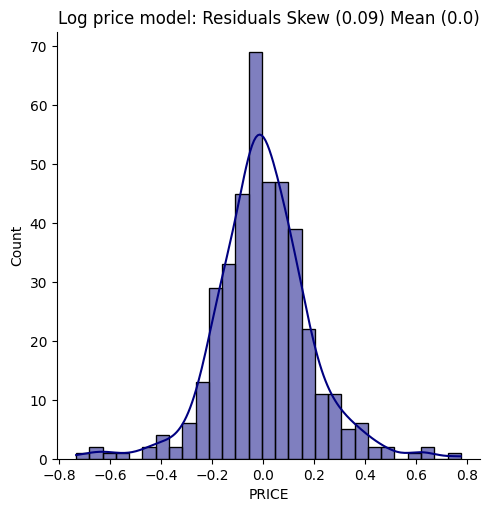

In [66]:
#calculate teh mean and the skew for the residuals using log prices
log_res_mean = round(log_residuals.mean(), 2)
log_res_skew = round(log_residuals.skew(), 2)

sns.displot(log_residuals, kde=True, color='navy')
plt.title(f'Log price model: Residuals Skew ({log_res_skew}) Mean ({log_res_mean})')
plt.show()


<h5> we can see that the mean = 0, and skew is super close to 0, so we can say that the data is normally distributed </h5>

# Compare Out of Sample Performance

The *real* test is how our model performs on data that it has not "seen" yet. This is where our `X_test` comes in. 

In [58]:
#compare the r-squared of the two models to see which one is better using x_test
print('R-squared of the original model: ', round(model.score(X_test, y_test),2))
print('R-squared of the model with log transformation: ', round(log_model.score(X_test, log_y_test), 2))


R-squared of the original model:  0.67
R-squared of the model with log transformation:  0.74


# Predict a Property's Value using the Regression Coefficients

Our preferred model now has an equation that looks like this:

$$ \log (PR \hat ICE) = \theta _0 + \theta _1 RM + \theta _2 NOX + \theta_3 DIS + \theta _4 CHAS + ... + \theta _{13} LSTAT $$

The average property has the mean value for all its charactistics:

In [59]:
# Starting Point: Average Values in the Dataset
features = data.drop(['PRICE'], axis=1)
average_vals = features.mean().values
property_stats = pd.DataFrame(data=average_vals.reshape(1, len(features.columns)), 
                              columns=features.columns)
property_stats

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,3.61,11.36,11.14,0.07,0.55,6.28,68.57,3.80,9.55,408.24,18.46,356.67,12.65


<h4> predicting the average property value using property characteristics </h4>

In [65]:
y_pred = log_model.predict(property_stats)[0]
pred_price = round(np.exp(y_pred),2)*1000
print("The estimated value of the property is: $",pred_price)

The estimated value of the property is: $ 20700.0
